In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

import joblib

In [2]:
df = pd.read_csv("../data/cleaned_climber_df.csv")
df.head()

,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean,...,country_NLD,country_NOR,country_POL,country_PRT,country_RUS,country_SVN,country_SWE,country_USA,country_ZAF,country_other
0,0,177,73,41.0,21,84,36,55,62,46.750000,...,0,0,0,0,0,0,1,0,0,0
1,0,180,78,44.0,22,12,53,51,59,52.833333,...,0,0,0,0,0,0,1,0,0,0
2,1,165,58,33.0,16,119,53,49,64,53.890756,...,0,0,0,0,0,0,1,0,0,0
3,0,167,63,52.0,25,298,53,49,63,49.406040,...,0,0,0,0,0,0,1,0,0,0
4,0,177,68,44.0,21,5,53,49,53,51.400000,...,0,1,0,0,0,0,0,0,0,0


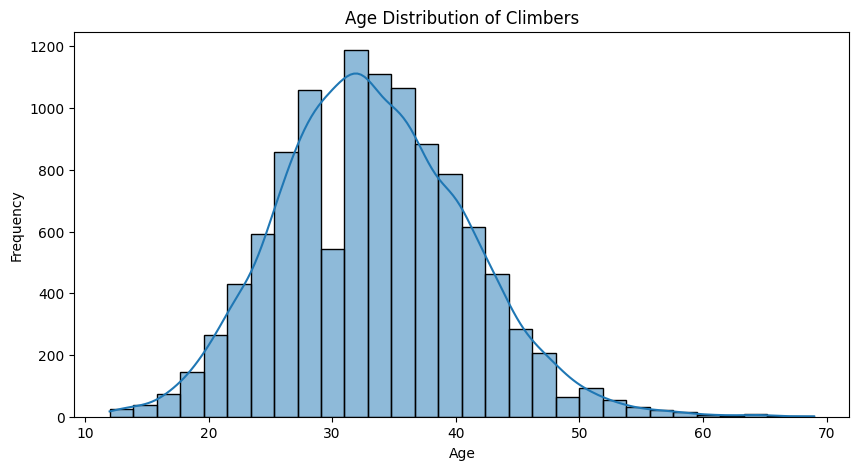

In [3]:
#see age repartition
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Climbers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

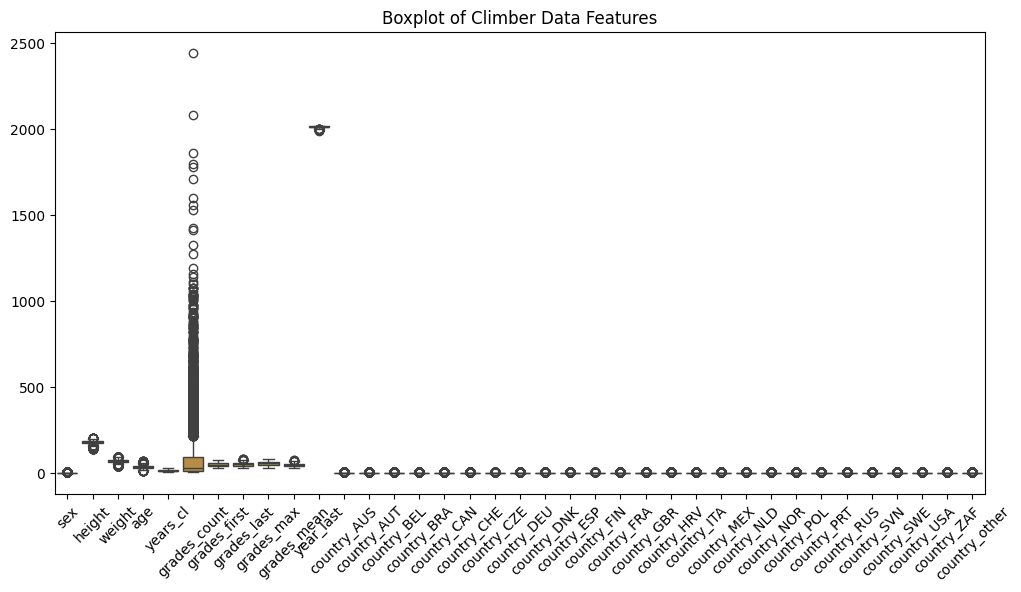

In [4]:
#boxplot of data together
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Climber Data Features")
plt.xticks(rotation=45)
plt.show()

In [5]:
#standardisation des données
scaler = StandardScaler()
X = df.drop('grades_max', axis=1)
y = df['grades_max']

X_scaled = scaler.fit_transform(X)

In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
#modèles de régression
models = {
    "LR": LinearRegression(),
    "RR": Ridge(alpha=1.0),
    "LaR": Lasso(alpha=0.1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    }


In [8]:
#affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)

           MSE       MAE        R2
LR   14.125761  2.932936  0.842495
RR   14.125198  2.932943  0.842501
LaR  14.146003  2.938907  0.842269


In [10]:
ridge = Ridge()

In [13]:
#hyperparameter tuning pour Ridge Regression
param_grid = {
    'alpha': np.logspace(-4, 4, 20),
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

In [14]:
#grid shearch pour ridge
grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',    
    cv=5,      
    n_jobs=-1,     
    verbose=2
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,estimator,Ridge()
,param_grid,"{'alpha': array([1.0000...00000000e+04]), 'fit_intercept': [True, False], 'solver': ['auto', 'svd', ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(4.281332398719396)


In [ ]:
#resultat grid search
print("Meilleurs hyperparamètres :", grid.best_params_)
print("Meilleure performance (R²) :", grid.best_score_)

Meilleurs hyperparamètres : {'alpha': np.float64(4.281332398719396), 'fit_intercept': True, 'solver': 'auto'}
Meilleure performance (R²) : 0.8486563235187724


In [20]:
#evaluation du model sur les données de test
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nÉvaluation finale sur le test set :")
print("R² :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))


Évaluation finale sur le test set :
R² : 0.8425214974440538
MAE : 2.932965080817135
RMSE : 3.7581112465246718


In [21]:
#enregistrement du modèle
joblib.dump(best_model, "../models/climbing_model.joblib")

['../models/climbing_model.joblib']